In [2]:
import pandas as pd 

def pars_result(df):
    NUM_MODELS = 5
    NUM_BATTS = 4
    MODELS = []
    SOC_CAPS = []
    HOUSEHOLDS = []
    HOUSE_NAME = []
    num_model = 0
    do_soc_cap = False
    do_models = False
    household_name = ''
    for index, row in df.iterrows():
        NUM_BATTS = int((len(row)-2)/2)
        if(row[0] == 'Household'):  
            do_soc_cap = True

        if do_soc_cap == True:
            soc_caps = []
            for i in range(NUM_BATTS):
                soc_caps.append(row[i*2 + 2])
            SOC_CAPS.append(soc_caps)
            do_models = True
            do_soc_cap = False
        elif do_models == True:
            if num_model == 0:
                household_name = row[0]            
            scss = []
            for i in range(NUM_BATTS):
                scss.append([row[i*2+2], row[i*2+3]])
            MODELS.append({row[1]:scss})
            num_model +=1
            if num_model == NUM_MODELS:
                HOUSE_NAME.append(household_name)
                HOUSEHOLDS.append({household_name:MODELS})
                do_soc_cap = True
                do_models = False
                num_model = 0
                MODELS = []

    return  HOUSE_NAME, SOC_CAPS, HOUSEHOLDS 
        

In [41]:
import pandas as pd 
NAME_RESULT = 'ML for Smart Grid - Result-Final.csv'
# NAME_RESULT = 'ML for Smart Grid - Result-Final-pv.csv'

df = pd.read_csv(NAME_RESULT, header=None)

_, soc_caps, households = pars_result(df)

[['0', '6', '13', '28'], ['1', '4', '8', '15'], ['4', '8', '12', '19'], ['25', '33', '41', '58']]


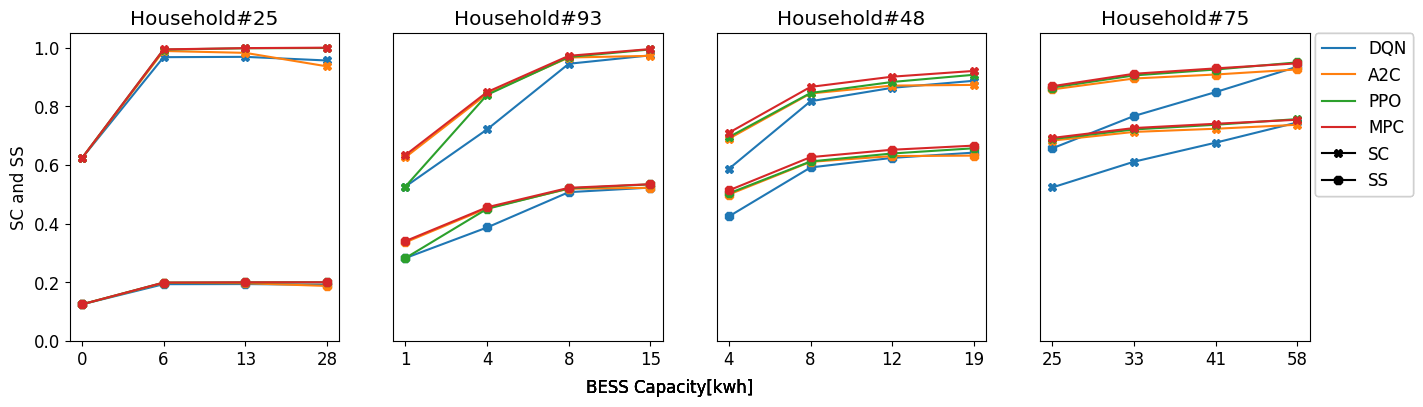

In [42]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np 

print(soc_caps)

ncols = len(households)

plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(16,4))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, items in enumerate(households):
    for h in items:
        axes[i].title.set_text(f'Household#{h}')
        if i == 0: axes[i].set_ylabel(f'SC and SS')
        else: axes[i].set_yticks([])
        cp = 0        
        markers = []
        for j, m in enumerate(items[h]):
            for d in m:
                if d == 'DDQN': continue
                tmp = np.array(m[d], dtype=float)
                if np.any(np.isnan(tmp)) == False :
                    sc_hdl, = axes[i].plot(soc_caps[i], np.array(m[d], dtype=float)[:, 0], label=f'{d}-SC', marker='X', color=colors[cp])
                    ss_hdl, = axes[i].plot(soc_caps[i], np.array(m[d], dtype=float)[:, 1], label=f'{d}-SS', marker='8', color=colors[cp])
                    axes[i].set_ylim([0., 1.05])
                    markers.append(mlines.Line2D([], [], color=colors[cp], label=f'{d}'))
                    cp += 1
                    # print('exp', i, np.array(m[d]))
                    
        markers.append(mlines.Line2D([], [], color='black', marker='X', label='SC'))
        markers.append(mlines.Line2D([], [], color='black', marker='8', label='SS'))
        fig.legend(handles=markers, ncol=1, bbox_to_anchor=(0.97, 0.9))
        fig.text(0.5, -0.02, 'BESS Capacity[kwh]', ha='center')

In [5]:
import pandas as pd 

NUM_MODELS = 5
NUM_BATTS = 4

def get_house_list(df):
    HOUSE_NAME = []
    num_model = 0
    do_soc_cap = False
    do_models = False
    household_name = ''
    for index, row in df.iterrows():
        NUM_BATTS = int((len(row)-2)/2)
        if(row[0] == 'Household'):  
            do_soc_cap = True

        if do_soc_cap == True:
            do_models = True
            do_soc_cap = False
        elif do_models == True:
            if num_model == 0:
                household_name = row[0]            
            num_model +=1
            if num_model == NUM_MODELS:
                HOUSE_NAME.append(household_name)
                do_soc_cap = True
                do_models = False
                num_model = 0

    return  HOUSE_NAME

def get_sol_list(hhname, df):
    SOLUTIONS = []
    num_model = 0
    do_soc_cap = False
    do_models = False
    household_name = ''
    for index, row in df.iterrows():
        NUM_BATTS = int((len(row)-2)/2)
        if(row[0] == 'Household'):  
            do_soc_cap = True
        if do_soc_cap == True:
            do_models = True
            do_soc_cap = False
        elif do_models == True:
            if num_model == 0:
                household_name = row[0]            
            SOLUTIONS.append(row[1])
            num_model +=1
            if num_model == NUM_MODELS:                
                do_soc_cap = True
                do_models = False
                num_model = 0
                if household_name == hhname:
                    return SOLUTIONS
                SOLUTIONS = []

    return  None

def get_soc_list(hhname, df):
    num_model = 0
    do_soc_cap = False
    do_models = False
    household_name = ''
    soc_caps = []
    for index, row in df.iterrows():
        NUM_BATTS = int((len(row)-2)/2)
        if(row[0] == 'Household'):  
            do_soc_cap = True

        if do_soc_cap == True:
            soc_caps = []
            for i in range(NUM_BATTS):
                soc_caps.append(row[i*2 + 2])
            do_models = True
            do_soc_cap = False
        elif do_models == True:
            if num_model == 0:
                household_name = row[0]            
            scss = []
            num_model +=1
            if num_model == NUM_MODELS:
                do_soc_cap = True
                do_models = False
                num_model = 0
                if household_name == hhname:
                    return soc_caps
                soc_caps = []

    return  None 

def get_scss(hhname, sol, soc, df):
    num_model = 0
    do_soc_cap = False
    do_models = False
    household_name = ''
    soc_pos = -1
    for index, row in df.iterrows():
        NUM_BATTS = int((len(row)-2)/2)
        if(row[0] == 'Household'):  
            do_soc_cap = True
        if do_soc_cap == True:
            for i in range(NUM_BATTS):
                soc_caps.append(row[i*2 + 2])
                if soc == row[i*2 + 2]:
                    soc_pos = i
            do_models = True
            do_soc_cap = False
        elif do_models == True:
            if num_model == 0:
                household_name = row[0]

            if household_name == hhname and row[1] == sol and soc_pos >= 0:
               return float(row[soc_pos*2+2]), float(row[soc_pos*2+3])
            
            num_model +=1
            if num_model == NUM_MODELS:
                do_soc_cap = True
                do_models = False
                num_model = 0
                soc_pos = -1

    return  None

In [6]:
import pandas as pd 
NAME_RESULT1 = 'ML for Smart Grid - Result-Final.csv'
NAME_RESULT2 = 'ML for Smart Grid - Result-Final-pv.csv'

df1 = pd.read_csv(NAME_RESULT1, header=None)
df2 = pd.read_csv(NAME_RESULT2, header=None)


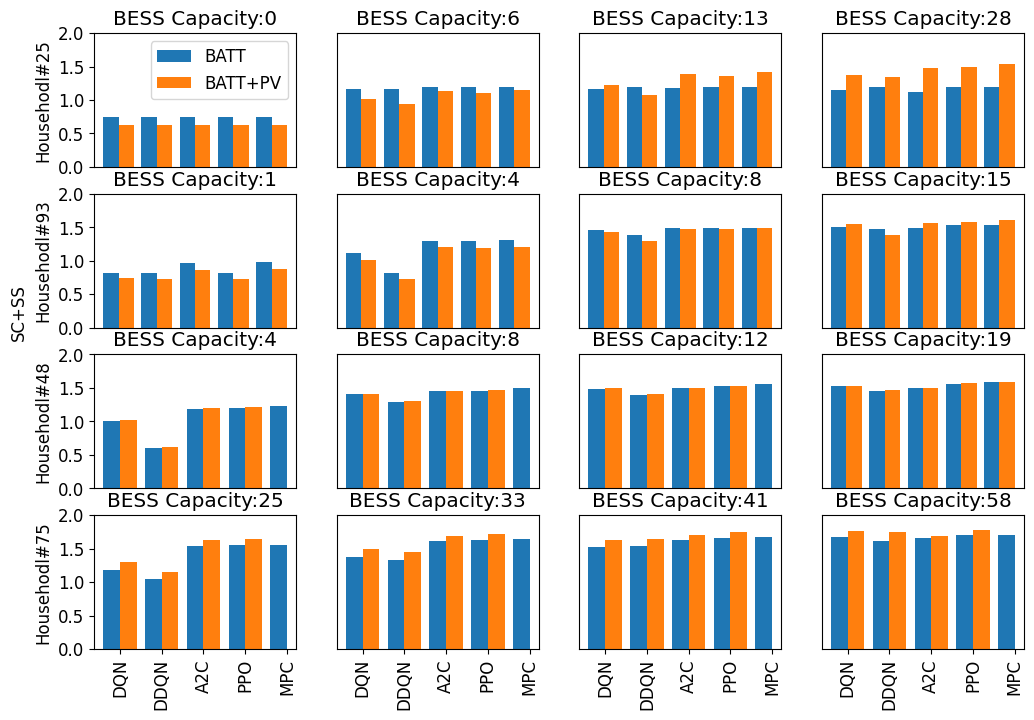

In [67]:
hhname1 = get_house_list(df1)
socs1 = get_soc_list(hhname1[1], df1)

nrows = len(hhname1)
ncols = len(socs1)

plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2))
fig.text(0.07, 0.5, 'SC+SS', horizontalalignment='right', rotation='vertical')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for r, hh in enumerate(hhname1):
    sols1 = get_sol_list(hh, df1)
    socs1 = get_soc_list(hh, df1)
    for c, soc in enumerate(socs1):
        scss1 = []
        scss2 = []
        for sol in sols1:
            sc1, ss1 = get_scss(hh, sol, soc, df1)
            sc2, ss2 = get_scss(hh, sol, soc, df2)
            scss1.append(sc1+ss1)
            scss2.append(sc2+ss2)
        X_axis = np.arange(len(sols1))
        axes[r][c].bar(X_axis - 0.2, scss1, 0.4, label='BATT')
        axes[r][c].bar(X_axis + 0.2, scss2, 0.4, label='BATT+PV')
        axes[r][c].set_ylim(0, 2)
        axes[r][c].set_title(f'BESS Capacity:{soc}')
        axes[r][c].set_xticks([])
        if c == 0:
            axes[r][c].set_ylabel(f'Househodl#{hh}')
            if r == 0:
                axes[r][c].legend()
        else:
            axes[r][c].set_yticks([])
        axes[-1][c].set_xticks(X_axis, sols1)
        axes[-1][c].tick_params(axis='x', rotation=90)
        
